<a href="https://colab.research.google.com/github/ramatsemela8/Project2/blob/main/Copy_of_EDA_and_persistance_forcast_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#time series data
data = pd.read_csv('/content/wm013.csv')

# the first few rows of the data
print(data.head())
print(data.info())


             date_time  Station_ID   WS_62_mean   WS_62_min   WS_62_max  \
0  2017-07-01 00:10:00        WM13       4.1629      3.6380      4.5697   
1  2017-07-01 00:20:00        WM13       4.0387      3.6380      4.8803   
2  2017-07-01 00:30:00        WM13       3.7964      3.3274      4.2592   
3  2017-07-01 00:40:00        WM13       4.0927      3.6380      4.5697   
4  2017-07-01 00:50:00        WM13       4.1275      3.9486      4.5697   

    WS_62_stdv   WS_60_mean   WS_60_min   WS_60_max   WS_60_stdv  ...  \
0       0.1776       4.0932      3.6295      4.5606       0.1856  ...   
1       0.2149       3.9846      3.6295      4.5606       0.2080  ...   
2       0.1745       3.7462      3.3191      4.2503       0.1775  ...   
3       0.1627       4.0783      3.9399      4.2503       0.1546  ...   
4       0.1553       4.0969      3.9399      4.2503       0.1552  ...   

    Tgrad_stdv   Pbaro_mean   Pbaro_min   Pbaro_max   Pbaro_stdv   RH_mean  \
0        0.033      1009.28     

<ipython-input-21-542ef9c74a56>:5: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/wm013.csv')


Perform EDA

In [2]:
import pandas as pd

# Load your time series data
data = pd.read_csv('/content/wm013.csv', parse_dates=['date_time'], index_col='date_time')

# Print the first few rows to confirm
print(data.head())
print(data.info())


<ipython-input-2-0d3798bca975>:4: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/wm013.csv', parse_dates=['date_time'], index_col='date_time')


                     Station_ID   WS_62_mean   WS_62_min   WS_62_max  \
date_time                                                              
2017-07-01 00:10:00        WM13       4.1629      3.6380      4.5697   
2017-07-01 00:20:00        WM13       4.0387      3.6380      4.8803   
2017-07-01 00:30:00        WM13       3.7964      3.3274      4.2592   
2017-07-01 00:40:00        WM13       4.0927      3.6380      4.5697   
2017-07-01 00:50:00        WM13       4.1275      3.9486      4.5697   

                      WS_62_stdv   WS_60_mean   WS_60_min   WS_60_max  \
date_time                                                               
2017-07-01 00:10:00       0.1776       4.0932      3.6295      4.5606   
2017-07-01 00:20:00       0.2149       3.9846      3.6295      4.5606   
2017-07-01 00:30:00       0.1745       3.7462      3.3191      4.2503   
2017-07-01 00:40:00       0.1627       4.0783      3.9399      4.2503   
2017-07-01 00:50:00       0.1553       4.0969      3.9399

In [6]:
print(data.columns.tolist())


[' Station_ID', ' WS_62_mean', ' WS_62_min', ' WS_62_max', ' WS_62_stdv', ' WS_60_mean', ' WS_60_min', ' WS_60_max', ' WS_60_stdv', ' WS_40_mean', ' WS_40_min', ' WS_40_max', ' WS_40_stdv', ' WS_20_mean', ' WS_20_min', ' WS_20_max', ' WS_20_stdv', ' WS_10_mean', ' WS_10_min', ' WS_10_max', ' WS_10_stdv', ' WD_60_mean', ' WD_60_min', ' WD_60_max', ' WD_60_stdv', ' WD_20_mean', ' WD_20_min', ' WD_20_max', ' WD_20_stdv', ' Tair_mean', ' Tair_min', ' Tair_max', ' Tair_stdv', ' Tgrad_mean', ' Tgrad_min', ' Tgrad_max', ' Tgrad_stdv', ' Pbaro_mean', ' Pbaro_min', ' Pbaro_max', ' Pbaro_stdv', ' RH_mean', ' RH_min', ' RH_max', ' RH_stdv', ' ']


In [7]:
data.columns = data.columns.str.strip()


In [8]:
print(data.head())
print(data.columns)


                    Station_ID  WS_62_mean  WS_62_min  WS_62_max  WS_62_stdv  \
date_time                                                                      
2017-07-01 00:10:00       WM13      4.1629     3.6380     4.5697      0.1776   
2017-07-01 00:20:00       WM13      4.0387     3.6380     4.8803      0.2149   
2017-07-01 00:30:00       WM13      3.7964     3.3274     4.2592      0.1745   
2017-07-01 00:40:00       WM13      4.0927     3.6380     4.5697      0.1627   
2017-07-01 00:50:00       WM13      4.1275     3.9486     4.5697      0.1553   

                     WS_60_mean  WS_60_min  WS_60_max  WS_60_stdv  WS_40_mean  \
date_time                                                                       
2017-07-01 00:10:00      4.0932     3.6295     4.5606      0.1856      3.2474   
2017-07-01 00:20:00      3.9846     3.6295     4.5606      0.2080      3.3663   
2017-07-01 00:30:00      3.7462     3.3191     4.2503      0.1775      3.6693   
2017-07-01 00:40:00      4.0783   

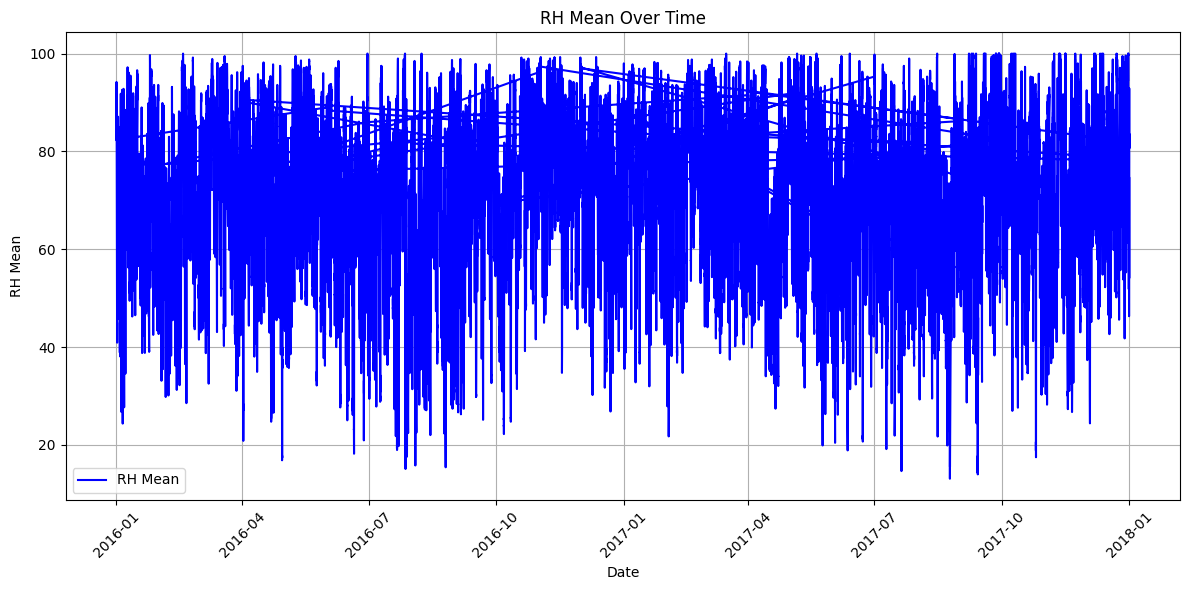

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RH_mean'], label='RH Mean', color='b')
plt.title('RH Mean Over Time')
plt.xlabel('Date')
plt.ylabel('RH Mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to fit labels and title
plt.show()

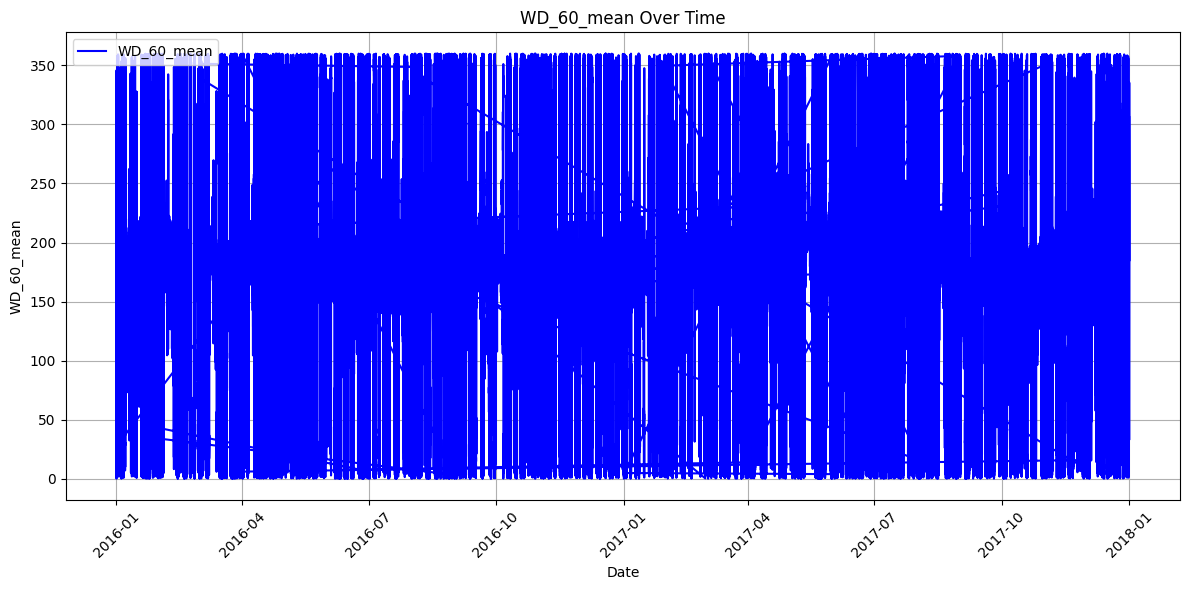

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['WD_60_mean'], label='WD_60_mean', color='b')
plt.title('WD_60_mean Over Time')
plt.xlabel('Date')
plt.ylabel('WD_60_mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to fit labels and title
plt.show()

In [15]:


# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Station_ID    0
WS_62_mean    0
WS_62_min     0
WS_62_max     0
WS_62_stdv    0
WS_60_mean    0
WS_60_min     0
WS_60_max     0
WS_60_stdv    0
WS_40_mean    0
WS_40_min     0
WS_40_max     0
WS_40_stdv    0
WS_20_mean    0
WS_20_min     0
WS_20_max     0
WS_20_stdv    0
WS_10_mean    0
WS_10_min     0
WS_10_max     0
WS_10_stdv    0
WD_60_mean    0
WD_60_min     0
WD_60_max     0
WD_60_stdv    0
WD_20_mean    0
WD_20_min     0
WD_20_max     0
WD_20_stdv    0
Tair_mean     0
Tair_min      0
Tair_max      0
Tair_stdv     0
Tgrad_mean    0
Tgrad_min     0
Tgrad_max     0
Tgrad_stdv    0
Pbaro_mean    0
Pbaro_min     0
Pbaro_max     0
Pbaro_stdv    0
RH_mean       0
RH_min        0
RH_max        0
RH_stdv       0
              0
dtype: int64


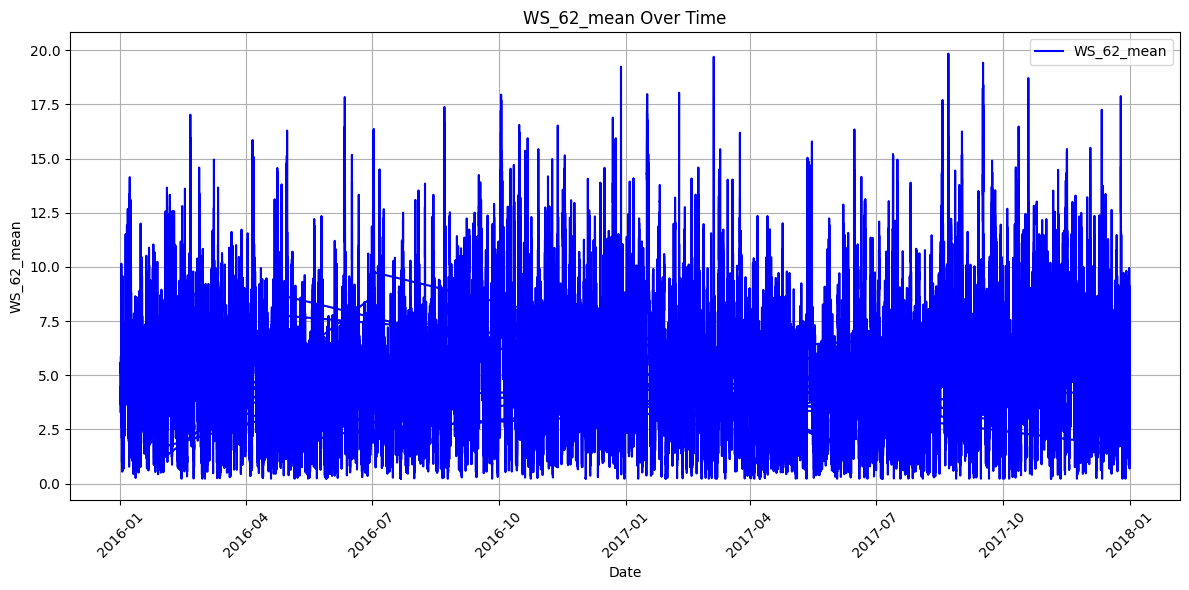

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['WS_62_mean'], label='WS_62_mean', color='b')
plt.title('WS_62_mean Over Time')
plt.xlabel('Date')
plt.ylabel('WS_62_mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to fit labels and title
plt.show()

In [4]:
# Check the column names and data types
print(data.columns)
print(data.dtypes)


Index([' Station_ID', ' WS_62_mean', ' WS_62_min', ' WS_62_max', ' WS_62_stdv',
       ' WS_60_mean', ' WS_60_min', ' WS_60_max', ' WS_60_stdv', ' WS_40_mean',
       ' WS_40_min', ' WS_40_max', ' WS_40_stdv', ' WS_20_mean', ' WS_20_min',
       ' WS_20_max', ' WS_20_stdv', ' WS_10_mean', ' WS_10_min', ' WS_10_max',
       ' WS_10_stdv', ' WD_60_mean', ' WD_60_min', ' WD_60_max', ' WD_60_stdv',
       ' WD_20_mean', ' WD_20_min', ' WD_20_max', ' WD_20_stdv', ' Tair_mean',
       ' Tair_min', ' Tair_max', ' Tair_stdv', ' Tgrad_mean', ' Tgrad_min',
       ' Tgrad_max', ' Tgrad_stdv', ' Pbaro_mean', ' Pbaro_min', ' Pbaro_max',
       ' Pbaro_stdv', ' RH_mean', ' RH_min', ' RH_max', ' RH_stdv', ' '],
      dtype='object')
 Station_ID     object
 WS_62_mean    float64
 WS_62_min     float64
 WS_62_max     float64
 WS_62_stdv    float64
 WS_60_mean    float64
 WS_60_min     float64
 WS_60_max     float64
 WS_60_stdv    float64
 WS_40_mean    float64
 WS_40_min     float64
 WS_40_max     floa

In [ ]:
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces

In [ ]:
# If the dataset has a 'Date' column, parse it as a datetime
if 'date_time' in data.columns:
    data['date_time'] = pd.to_datetime(data['date_time'])
    data.set_index('date_time', inplace=True)

# Check the index type
print(data.index)

DatetimeIndex(['2017-07-01 00:50:00', '2017-07-01 01:00:00',
               '2017-07-01 01:10:00', '2017-07-01 01:20:00',
               '2017-07-01 01:30:00', '2017-07-01 01:40:00',
               '2017-07-01 01:50:00', '2017-07-01 02:00:00',
               '2017-07-01 02:10:00', '2017-07-01 02:20:00',
               ...
               '2017-10-31 22:30:00', '2017-10-31 22:40:00',
               '2017-10-31 22:50:00', '2017-10-31 23:00:00',
               '2017-10-31 23:10:00', '2017-10-31 23:20:00',
               '2017-10-31 23:30:00', '2017-10-31 23:40:00',
               '2017-10-31 23:50:00', '2017-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date_time', length=105260, freq=None)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/wm013.csv')

# Print columns to verify their names
print(data.columns)

# Correctly access the column (replace 'Station_ID' with the actual column name if different)
if 'Station_ID' in data.columns:
    station_ids = data['Station_ID']
    print(station_ids.head())
else:
    print("Error: 'Station_ID' column not found in the data.")


Index(['date_time', ' Station_ID', ' WS_62_mean', ' WS_62_min', ' WS_62_max',
       ' WS_62_stdv', ' WS_60_mean', ' WS_60_min', ' WS_60_max', ' WS_60_stdv',
       ' WS_40_mean', ' WS_40_min', ' WS_40_max', ' WS_40_stdv', ' WS_20_mean',
       ' WS_20_min', ' WS_20_max', ' WS_20_stdv', ' WS_10_mean', ' WS_10_min',
       ' WS_10_max', ' WS_10_stdv', ' WD_60_mean', ' WD_60_min', ' WD_60_max',
       ' WD_60_stdv', ' WD_20_mean', ' WD_20_min', ' WD_20_max', ' WD_20_stdv',
       ' Tair_mean', ' Tair_min', ' Tair_max', ' Tair_stdv', ' Tgrad_mean',
       ' Tgrad_min', ' Tgrad_max', ' Tgrad_stdv', ' Pbaro_mean', ' Pbaro_min',
       ' Pbaro_max', ' Pbaro_stdv', ' RH_mean', ' RH_min', ' RH_max',
       ' RH_stdv', ' '],
      dtype='object')
Error: 'Station_ID' column not found in the data.


<ipython-input-11-5d15c71b699b>:5: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/wm013.csv')


In [ ]:

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

          WS_62_mean      WS_62_min      WS_62_max     WS_62_stdv  \
count  105264.000000  105264.000000  105264.000000  105264.000000   
mean        5.150299       3.479426       6.801284       0.675623   
std         2.797715       2.002618       3.615170       0.431900   
min         0.221800       0.221800       0.221800       0.000000   
25%         2.945400       1.774600       3.948600       0.322400   
50%         4.824400       3.327400       6.433200       0.591900   
75%         6.911400       4.880300       9.228300       0.937900   
max        19.843600      14.508000      48.670700      13.012900   

          WS_60_mean      WS_60_min      WS_60_max     WS_60_stdv  \
count  105264.000000  105264.000000  105264.000000  105264.000000   
mean        5.112486       3.444121       6.760148       0.673890   
std         2.782469       1.990594       3.600204       0.430205   
min         0.215200       0.215200       0.215200       0.000000   
25%         2.918700       1.7671

In [18]:
if 'Tair_mean' in data.columns:
    print("Column 'Tair_mean' exists")
else:
    print("Column 'Tair_mean' does not exist")


Column 'Tair_mean' exists


Persistance model

<ipython-input-19-2d7c9f7d8217>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag'] = test['Tair_mean'].shift(1)
<ipython-input-19-2d7c9f7d8217>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = test['Lag'].fillna(method='bfill')  # Fill missing values if any


Mean Squared Error of Persistence Model: 2685.791004232176


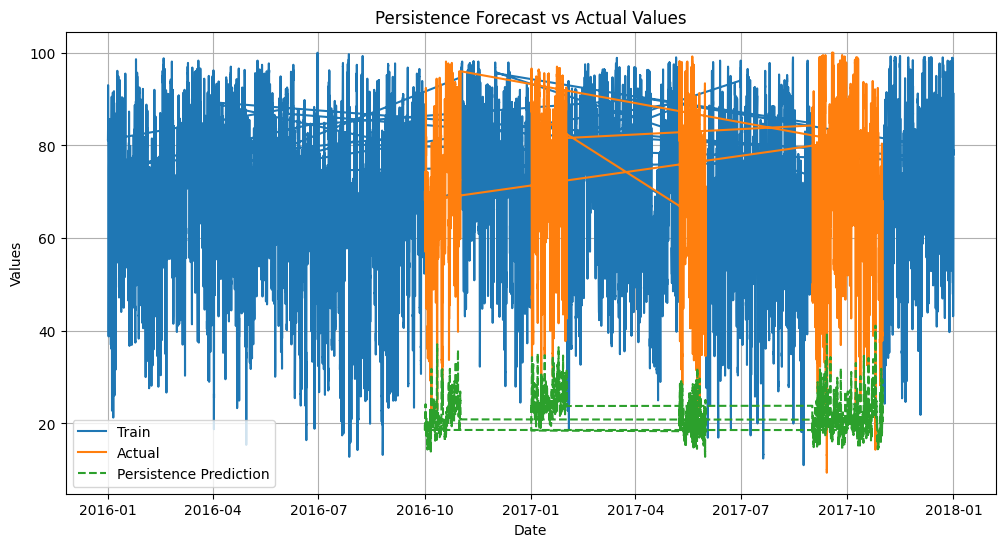

In [19]:
from sklearn.metrics import mean_squared_error

# Create a lagged version of the dataset for the persistence model
#df_single['Lag'] = data['Pbaro_mean']  # Or df_multi['B'] if you need the 'B' column

data['Tair_mean_lag1'] = data['Tair_mean'].shift(1)
#data['Lag'] = data.shift(1)
data.dropna(inplace=True)  # Drop rows with NaN values

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit persistence model (predicting the next value as the last observed value)
y_train = train['RH_min']  # Replace 'Value' with the actual column name
y_test = test['RH_min']

# Assume 'Lag' is the column with the last observed value for prediction
# Create lagged values for the test set
test['Lag'] = test['Tair_mean'].shift(1)
y_pred = test['Lag']
# Use the lagged value to predict
y_pred = test['Lag'].fillna(method='bfill')  # Fill missing values if any

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Persistence Model: {mse}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, y_train, label='Train')
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Persistence Prediction', linestyle='--')
plt.title('Persistence Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
print("Training Data:")
print(y_train)
print("\nTest Data:")
print(y_test)
print("\nPredicted Values:")
print(y_pred)

Training Data:
date_time
2017-07-01 00:20:00    94.30
2017-07-01 00:30:00    94.50
2017-07-01 00:40:00    94.80
2017-07-01 00:50:00    94.90
2017-07-01 01:00:00    95.00
                       ...  
2017-05-08 18:30:00    75.24
2017-05-08 18:40:00    76.30
2017-05-08 18:50:00    77.49
2017-05-08 19:00:00    78.75
2017-05-08 19:10:00    80.10
Name: RH_min, Length: 84210, dtype: float64

Test Data:
date_time
2017-05-08 19:20:00    81.10
2017-05-08 19:30:00    81.70
2017-05-08 19:40:00    82.80
2017-05-08 19:50:00    84.20
2017-05-08 20:00:00    85.00
                       ...  
2017-10-31 23:20:00    65.65
2017-10-31 23:30:00    66.22
2017-10-31 23:40:00    66.94
2017-10-31 23:50:00    67.35
2017-11-01 00:00:00    67.96
Name: RH_min, Length: 21053, dtype: float64

Predicted Values:
date_time
2017-05-08 19:20:00    23.24
2017-05-08 19:30:00    23.24
2017-05-08 19:40:00    23.14
2017-05-08 19:50:00    22.96
2017-05-08 20:00:00    22.84
                       ...  
2017-10-31 23:20:00    2